# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
PATH = '../2_Data'


In [3]:
#import global-data-on-sustainable-energy dataframe
df_global_data = pd.read_csv(join(PATH,'2_1_Original_Data','global-data-on-sustainable-energy.csv'))
df_global_data.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


In [4]:
df_global_data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [5]:
#Rename columns for readability
df_global_data.rename(columns = {'Entity' : 'Country'}, inplace = True)


In [6]:
#changes the data type of the "Agency_code" column from a number to a object
df_global_data['Country'] =df_global_data['Country'].astype('object')
df_global_data['Year'] = df_global_data['Year'].astype('object')

In [7]:
# Import data
df_combined_global_details = pd.read_csv(join(PATH,'2_2_Prepared_Data','df_combined_global_details.csv'))
df_combined_global_details.head()

,Unnamed: 0,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),...,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data
0,0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
1,1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
2,2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
3,3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
4,4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0


In [8]:
df_combined_global_details.dtypes

Unnamed: 0                                                            int64
Country                                                              object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy inten

In [9]:
#changes the data type of the "Agency_code" column from a number to a object
df_combined_global_details['Country'] = df_combined_global_details['Country'].astype('object')
df_combined_global_details['Year'] = df_combined_global_details['Year'].astype('object')

In [10]:
df_combined_global_details.dtypes

Unnamed: 0                                                            int64
Country                                                              object
Year                                                                 object
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy inten

### 3. Exploring Relationships

In [11]:
#Select numeric columns
numeric_cols = df_combined_global_details.select_dtypes(include='number').columns

In [12]:
#Detect columns with commas
cols_with_commas = []
for col in numeric_cols:
    if df_combined_global_details[col].astype(str).str.contains(',').any():
        cols_with_commas.append(col)

In [13]:
print(cols_with_commas)

[]


In [14]:
print(numeric_cols)

Index(['Unnamed: 0', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Land Area(Km2)', 'Latitude', 'Longitude',
       'National accounts reference year', 'Latest industrial data',
       'Latest trade data'],
      dtype='object')


In [15]:
df_combined_global_details[numeric_cols].corr()

,Unnamed: 0,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),...,Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude,National accounts reference year,Latest industrial data,Latest trade data
Unnamed: 0,1.000000,-0.016357,-0.010813,-0.063552,-0.004079,-0.002152,0.026545,0.085305,-0.048509,-0.036391,...,0.008355,-0.067117,0.002172,-0.006070,-0.107400,-0.068374,0.115307,-0.209866,-0.041398,0.027420
Access to electricity (% of population),-0.016357,1.000000,0.866554,0.270423,0.060478,-0.784514,0.123999,0.128713,0.138057,-0.151062,...,0.126988,0.058195,-0.112071,0.418459,0.054964,0.420548,-0.102857,0.158437,0.433080,0.227656
Access to clean fuels for cooking,-0.010813,0.866554,1.000000,0.227962,0.042204,-0.791740,0.100752,0.163473,0.124486,-0.120110,...,0.095629,0.063131,-0.145301,0.545165,0.074630,0.432700,-0.131847,0.411433,0.440916,0.232123
Renewable-electricity-generating-capacity-per-capita,-0.063552,0.270423,0.227962,1.000000,0.003677,0.054821,0.051483,0.080168,0.147768,0.427264,...,0.046755,0.718511,-0.013462,0.017266,0.070355,-0.041691,-0.025587,0.233144,0.188961,0.060254
Financial flows to developing countries (US $),-0.004079,0.060478,0.042204,0.003677,1.000000,-0.005519,0.139238,0.127840,0.122362,-0.002716,...,0.126609,-0.023016,0.003324,0.067525,0.141528,0.021782,0.029141,0.142643,0.110122,0.092655
Renewable energy share in the total final energy consumption (%),-0.002152,-0.784514,-0.791740,0.054821,-0.005519,1.000000,-0.134888,-0.136525,-0.068779,0.467862,...,-0.132715,0.768166,0.075236,-0.370648,-0.045395,-0.330140,0.018284,-0.113304,-0.356174,-0.161864
Electricity from fossil fuels (TWh),0.026545,0.123999,0.100752,0.051483,0.139238,-0.134888,1.000000,0.646716,0.845067,-0.063773,...,0.989741,-0.088586,0.020956,0.107793,0.627682,0.110994,0.045413,0.097686,0.081212,0.074538
Electricity from nuclear (TWh),0.085305,0.128713,0.163473,0.080168,0.127840,-0.136525,0.646716,1.000000,0.492011,0.071715,...,0.598495,-0.057667,-0.048455,0.231349,0.473280,0.177961,-0.087111,0.126370,0.125188,0.076549
Electricity from renewables (TWh),-0.048509,0.138057,0.124486,0.147768,0.122362,-0.068779,0.845067,0.492011,1.000000,0.091451,...,0.856270,0.166374,-0.002531,0.139674,0.704884,0.112833,-0.016380,0.082148,0.111416,0.088983
Low-carbon electricity (% electricity),-0.036391,-0.151062,-0.120110,0.427264,-0.002716,0.467862,-0.063773,0.071715,0.091451,1.000000,...,-0.054515,0.782388,-0.015196,0.007945,0.044866,-0.029134,-0.045336,0.111729,0.035708,0.235619


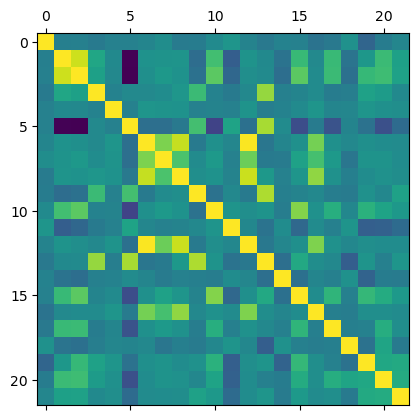

In [16]:
#Now, we use the above data to create a correlation heatmap using matplotlib

plt.matshow(df_combined_global_details[numeric_cols].corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

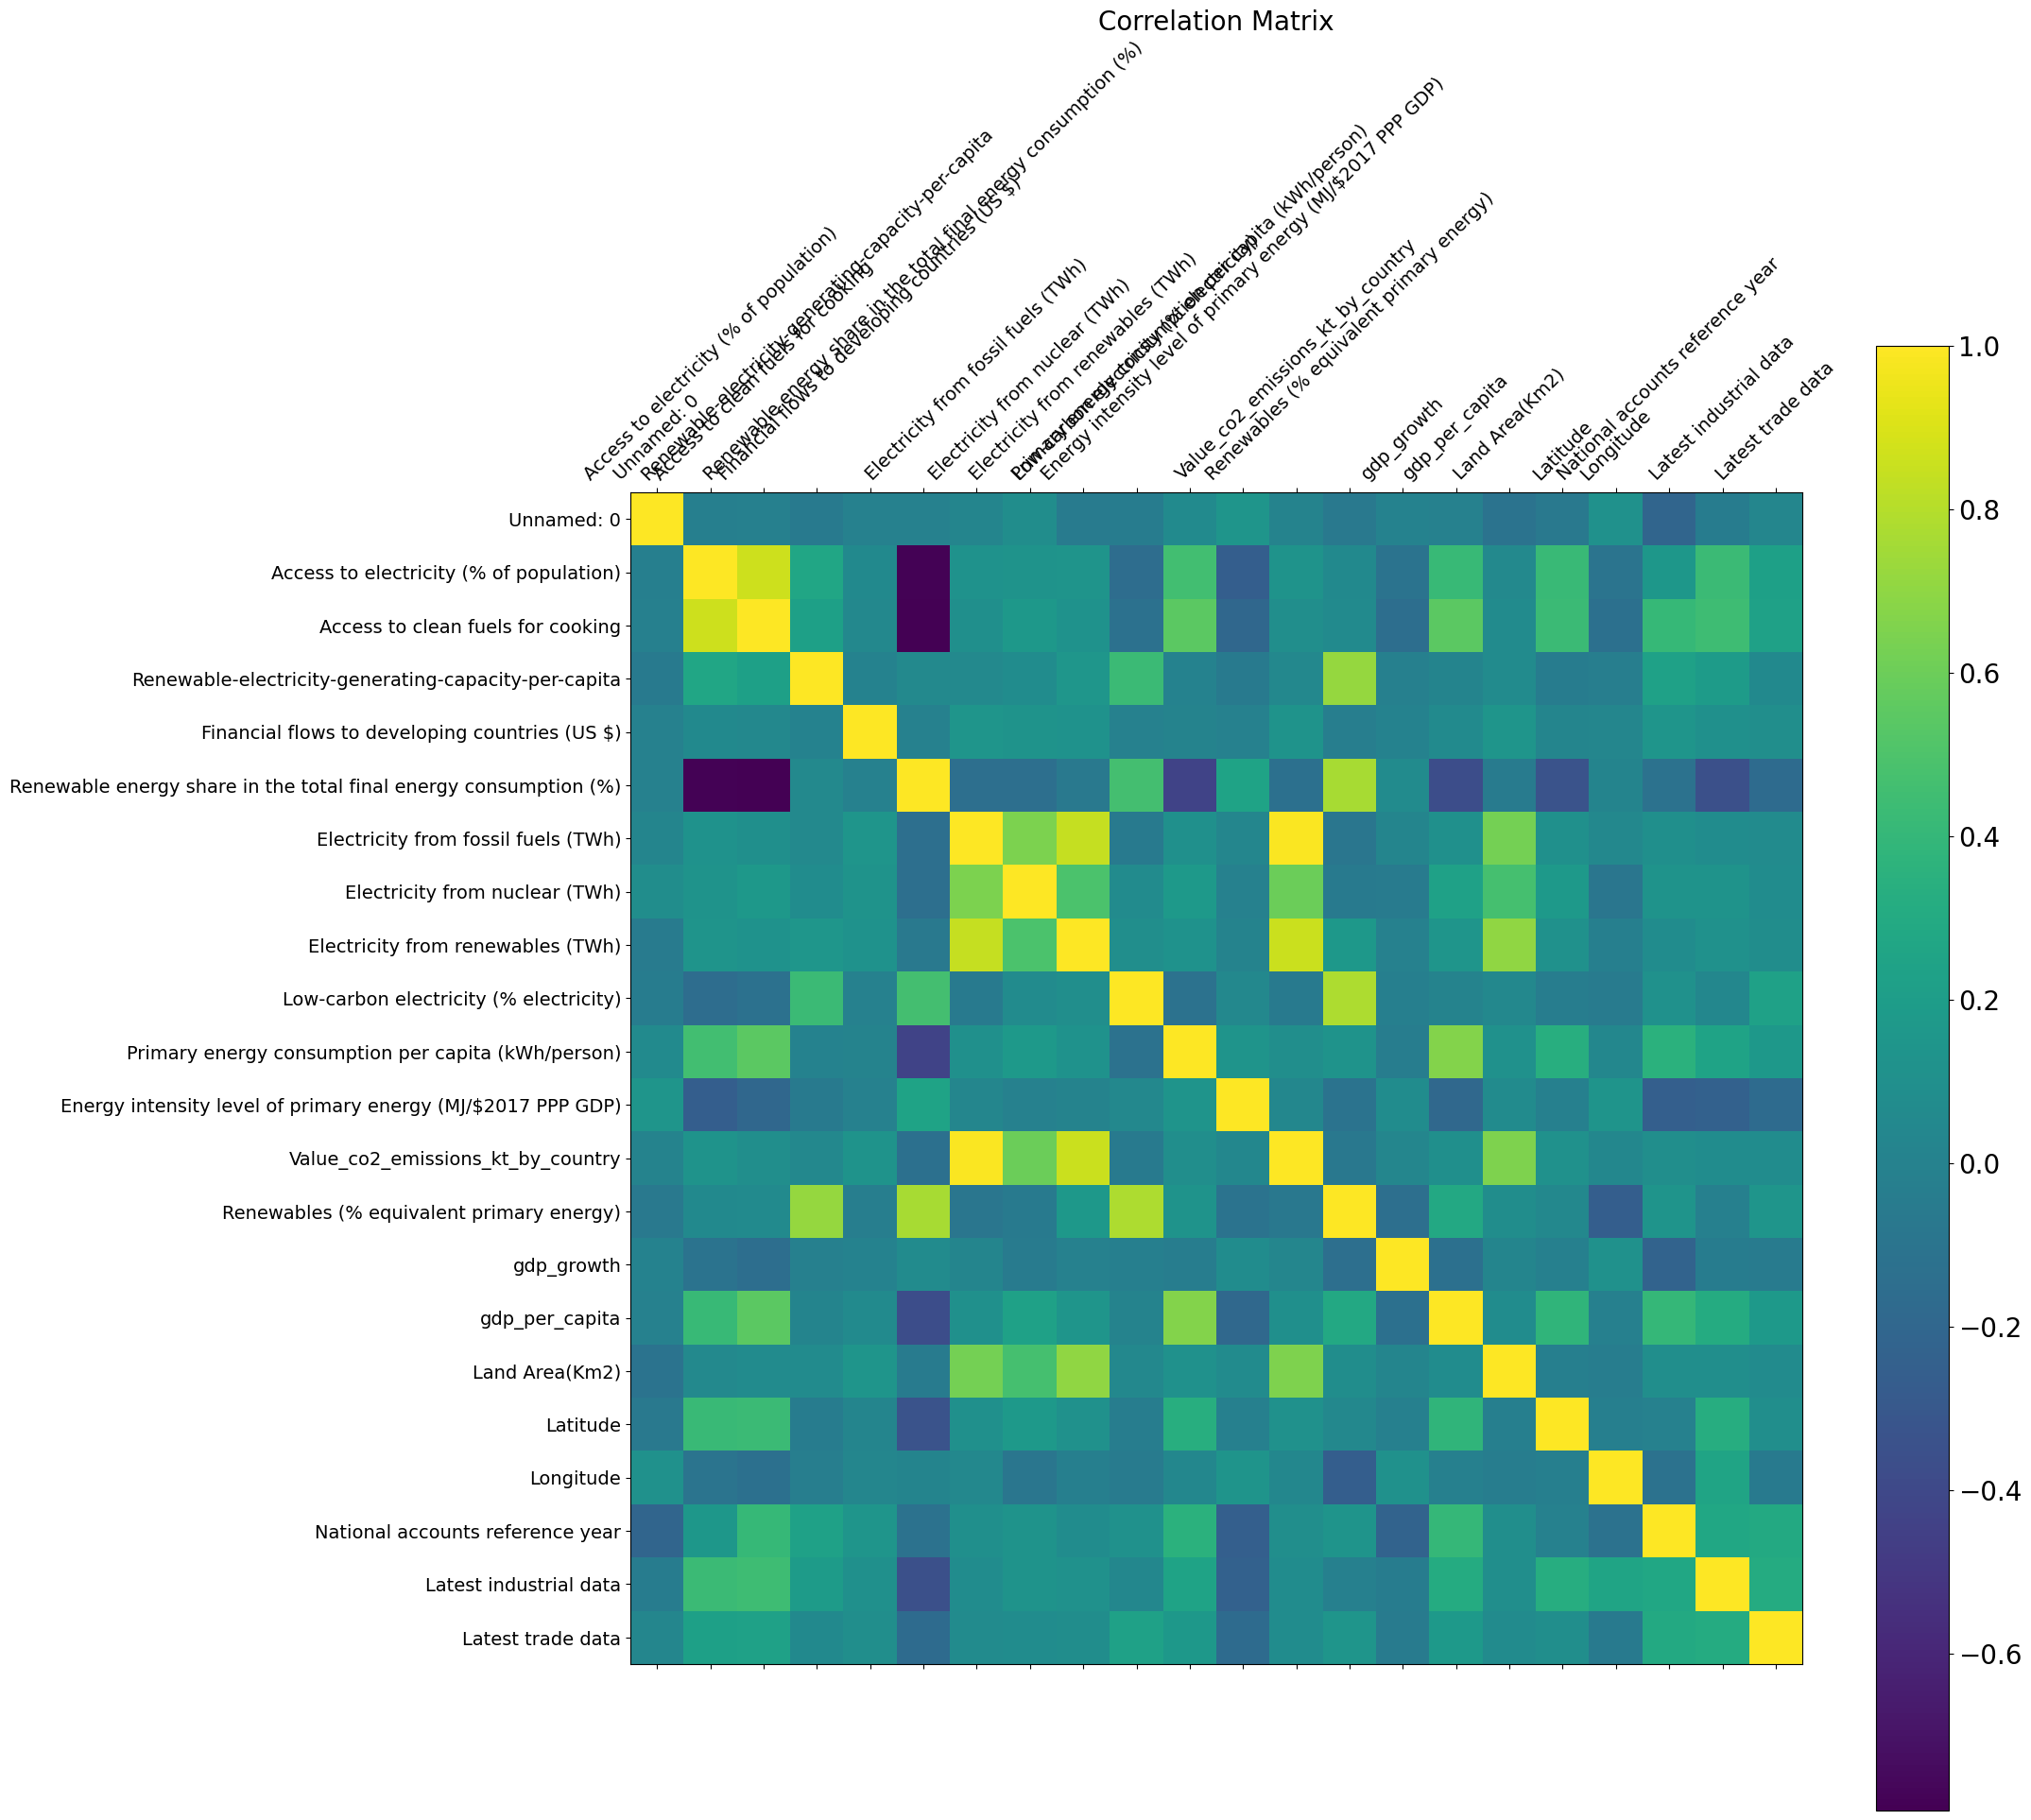

In [17]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(20, 20)) # figure size 
plt.matshow(df_combined_global_details[numeric_cols].corr(), fignum=f.number) # type of plot
plt.xticks(range(df_combined_global_details[numeric_cols].corr().shape[1]),df_combined_global_details[numeric_cols].corr().columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_combined_global_details[numeric_cols].corr().shape[1]),df_combined_global_details[numeric_cols].corr().columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=20) # add font size
plt.title('Correlation Matrix', fontsize=20) # add title

###As shown in the legend, the darker the color of a square, the stronger the negative relationship between those two variables. Conversely, the lighter the color in the square, the stronger the positive relationship between the two variables

In [18]:
df_combined_global_details[numeric_cols].corr().columns

Index(['Unnamed: 0', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Land Area(Km2)', 'Latitude', 'Longitude',
       'National accounts reference year', 'Latest industrial data',
       'Latest trade data'],
      dtype='object')

In [19]:
# Create a subset excluding the "Date" and "No" columns

sub = df_combined_global_details[numeric_cols].corr()[['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)','Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)','Electricity from nuclear (TWh)','Low-carbon electricity (% electricity)','Primary energy consumption per capita (kWh/person)','Value_co2_emissions_kt_by_country','gdp_growth','gdp_per_capita']]

In [20]:
sub

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita
Unnamed: 0,-0.016357,-0.010813,-0.063552,-0.004079,-0.002152,0.026545,0.085305,-0.036391,0.063289,0.008355,0.002172,-0.006070
Access to electricity (% of population),1.000000,0.866554,0.270423,0.060478,-0.784514,0.123999,0.128713,-0.151062,0.454870,0.126988,-0.112071,0.418459
Access to clean fuels for cooking,0.866554,1.000000,0.227962,0.042204,-0.791740,0.100752,0.163473,-0.120110,0.551347,0.095629,-0.145301,0.545165
Renewable-electricity-generating-capacity-per-capita,0.270423,0.227962,1.000000,0.003677,0.054821,0.051483,0.080168,0.427264,0.000290,0.046755,-0.013462,0.017266
Financial flows to developing countries (US $),0.060478,0.042204,0.003677,1.000000,-0.005519,0.139238,0.127840,-0.002716,0.009860,0.126609,0.003324,0.067525
Renewable energy share in the total final energy consumption (%),-0.784514,-0.791740,0.054821,-0.005519,1.000000,-0.134888,-0.136525,0.467862,-0.429362,-0.132715,0.075236,-0.370648
Electricity from fossil fuels (TWh),0.123999,0.100752,0.051483,0.139238,-0.134888,1.000000,0.646716,-0.063773,0.105529,0.989741,0.020956,0.107793
Electricity from nuclear (TWh),0.128713,0.163473,0.080168,0.127840,-0.136525,0.646716,1.000000,0.071715,0.180833,0.598495,-0.048455,0.231349
Electricity from renewables (TWh),0.138057,0.124486,0.147768,0.122362,-0.068779,0.845067,0.492011,0.091451,0.119760,0.856270,-0.002531,0.139674
Low-carbon electricity (% electricity),-0.151062,-0.120110,0.427264,-0.002716,0.467862,-0.063773,0.071715,1.000000,-0.119386,-0.054515,-0.015196,0.007945


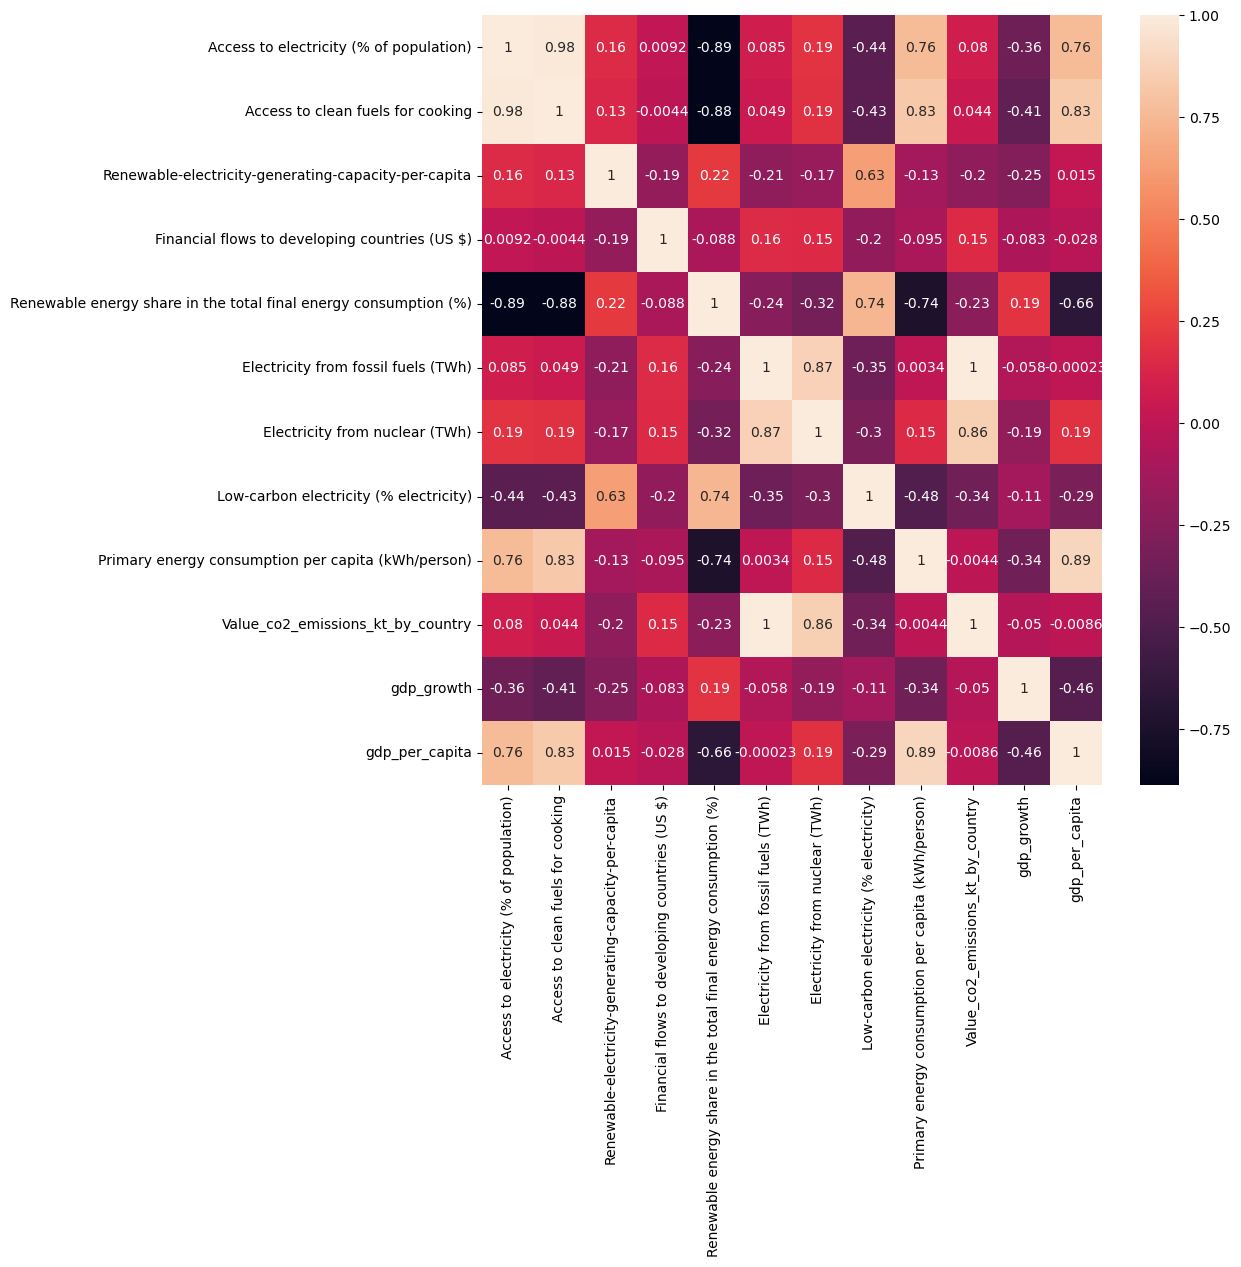

In [21]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [33]:
plt.savefig("heat_map.png")

<Figure size 640x480 with 0 Axes>

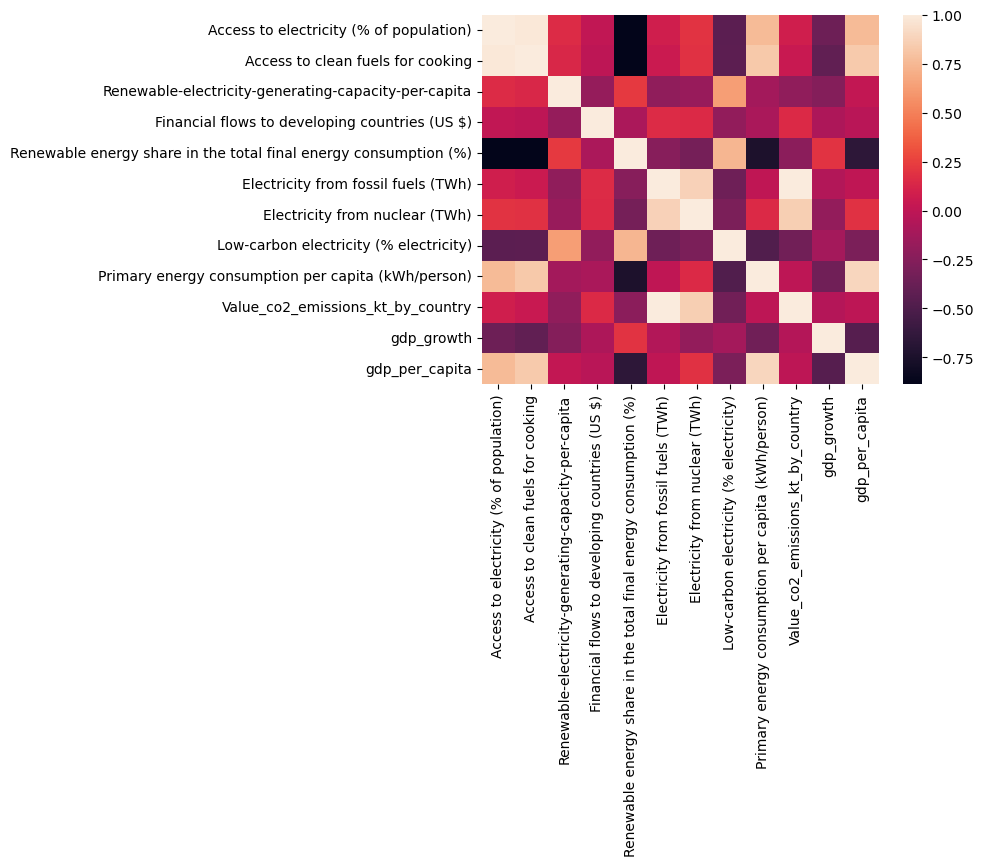

In [32]:
# Save figure
plt.corr = sns.heatmap(sub.corr())
plt.savefig("out.png") 


# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

### The same as above, the lighter the color, the stronger the (positive) relationship, and vice versa for the darker colors.

### Interpreteration of the Correlation & Exploring Relationships

#### Access to electricity (% of population)

Access to clean fuels for cooking  0.866554 coefficient indicates a strong positive correlation, which means that access access to electricity command access to clean fuels for cooking and vice versa

Primary energy consumption per capita (kWh/person)  0.454870 coefficient indicates a moderate postive correlation. This could be interpreted as “access to electricity by the population has moderate relation in primary energy consumption by the per capita KWH/person and vice versa"

Renewable energy share in the total final energy consumption (%) -0.784514 coefficient indicates a negative correlation. This could be interpreted as “access to electricity, the low or no access Renewable energy and vice versa"

gdp_per_capita  0.418459 coefficient indicates a moderate postive correlation could be interpreted as gdp_per_capita as moderate relationship to the access to electricity and vice versa


###Scatterplots:

C:\Users\TOSIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


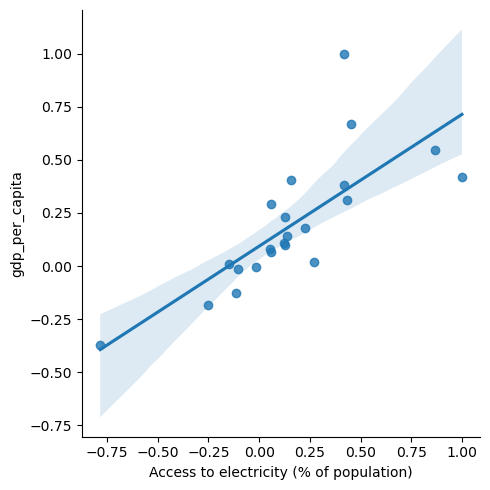

In [23]:
# Create a scatterplot for the "Access to electricity (% of population)" and "gdp_per_capita" columns in seaborn

sns.lmplot(x = 'Access to electricity (% of population)', y = 'gdp_per_capita', data =  df_combined_global_details[numeric_cols].corr())

In [24]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'gdp_per_capita']]

C:\Users\TOSIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\TOSIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\TOSIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\TOSIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

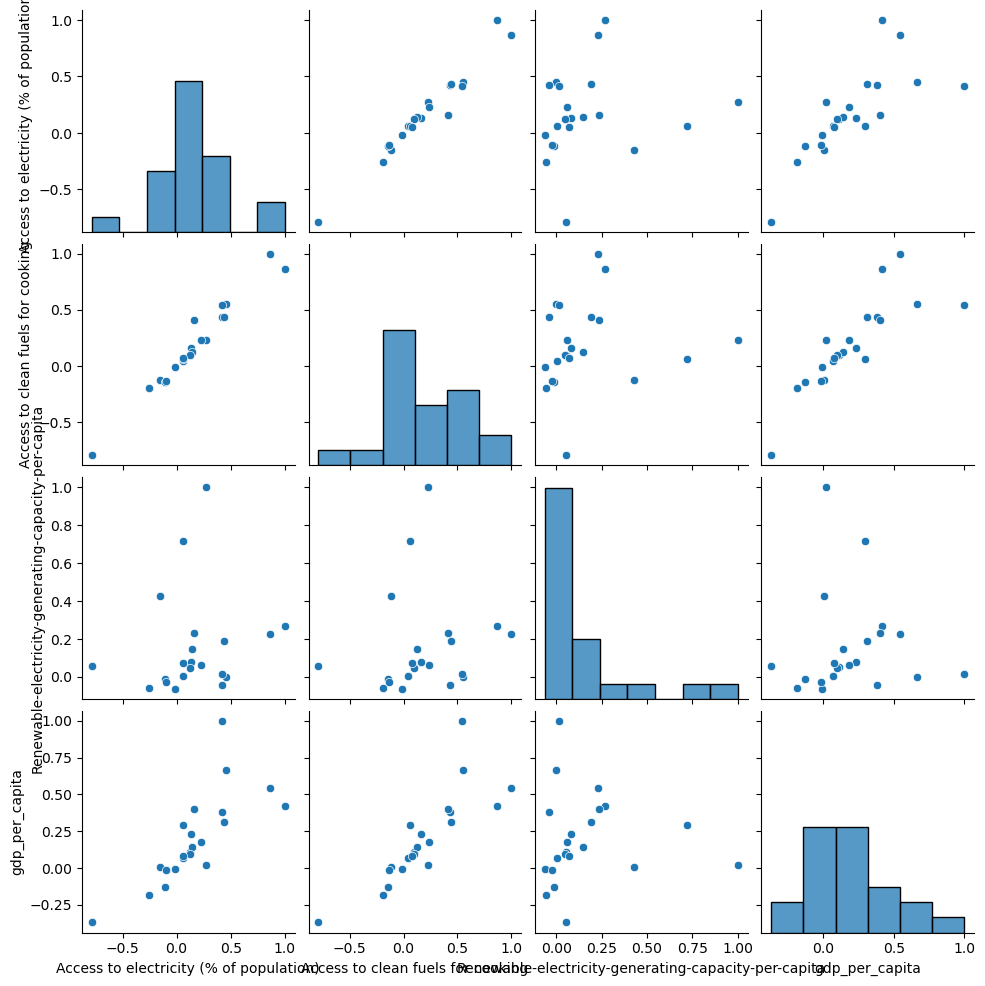

In [25]:
# Create a pair plot 

g = sns.pairplot(sub_2)

## Exploring hypotheses and key questions

#### Energy Production, Consumption, and Prediction: 

Energy Production, Consumption, and Prediction: 
Access to electricity has a direct positive relation to access to clean fuels for Consumption 
Energy Access classification: Categorize regions for infrastructure development, understanding sustainable energy role.

Carbon Emission Forecasting:
Access to electricity has very weak/negative to low carbon emission

Energy Equity Analysis:
gdp_per_capita Has a moderate positive relationship with Access to electricity (% of the population) and Access to clean fuels for cooking 

Energy efficiency Optimization: 
gdp_per_capita Has a moderate positive relationship with Access to electricity (% of the population) and Access to clean fuels for cooking 

Renewable Energy Potential assessment: 
gdp_per_capita Has a moderate positive relationship with Access to electricity (% of the population) and Access to clean fuels for cooking 

Renewable Energy investment strategies: 
Renewable Energy consumption of the equivalent of the primary energy consumption is has a negative relation to the current rate of energy consumption 
